<a href="https://colab.research.google.com/github/manyajsingh/MachineLearning/blob/Personal_ML/DT_RF_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Decision Tree Classifier
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('heart_failure_clinical_records_dataset (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

[Text(0.3402777777777778, 0.95, 'x[11] <= 67.0\ngini = 0.424\nsamples = 239\nvalue = [166, 73]'),
 Text(0.1388888888888889, 0.85, 'x[2] <= 109.5\ngini = 0.208\nsamples = 51\nvalue = [6, 45]'),
 Text(0.05555555555555555, 0.75, 'x[8] <= 134.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.027777777777777776, 0.65, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.08333333333333333, 0.65, 'x[6] <= 205500.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.05555555555555555, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1111111111111111, 0.55, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2222222222222222, 0.75, 'x[4] <= 72.5\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(0.19444444444444445, 0.65, 'x[7] <= 0.7\ngini = 0.049\nsamples = 40\nvalue = [1, 39]'),
 Text(0.16666666666666666, 0.55, 'x[2] <= 594.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1388888888888889, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19444444444444445, 0.4

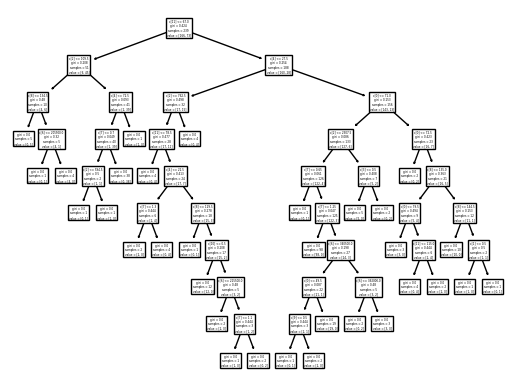

In [ ]:
X=df.drop(columns='DEATH_EVENT', axis=1)
y=df['DEATH_EVENT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=44)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
clt=dt.fit(X_train, y_train)
tree.plot_tree(clt)

In [ ]:
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))
print("\n")

dt1=DecisionTreeClassifier(max_depth=8)
dt1.fit(X_train, y_train)
print(dt1.score(X_train, y_train))
print(dt1.score(X_test, y_test))
print("\n")

from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[3,4,5,6,7], 'max_leaf_nodes':[2,3,4,5,6]}
dt2=DecisionTreeClassifier()
dt2=GridSearchCV(dt2, parameters)
dt2.fit(X_train, y_train)
print(dt2.score(X_train, y_train))
print(dt2.score(X_test, y_test))

1.0
0.75


0.9916317991631799
0.7833333333333333


0.8744769874476988
0.8


In [ ]:
dt2.best_params_ # best parameters

{'max_depth': 4, 'max_leaf_nodes': 5}

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=dt2.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[33,  4],
       [ 8, 15]])

In [ ]:
tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()
print(tn, tp, fn, fp)

33 15 8 4


In [ ]:
y_pred_total=dt2.predict(X)
tn, fp, fn, tp=confusion_matrix(y, y_pred_total).ravel()
print(tn, fp, fn, tp)

193 10 32 64


In [ ]:
df['DEATH_EVENT'].value_counts() # total 203 negative data (0) -> our model could predict 193 correctly
                                 # total 96 positive data (1) -> our model could predict 64 correctly

0    203
1     96
Name: DEATH_EVENT, dtype: int64



```
Decision Tree Regressor
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('housing_data (1).csv')
pd.set_option('display.max_columns', 30)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print(df.shape)
df.isnull().sum()

(21613, 21)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
x=df.drop(columns=['price', 'id', 'date'])
y=df['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)

from sklearn.tree import DecisionTreeRegressor
rg=DecisionTreeRegressor()
rg.fit(x_train, y_train)

y_predict_test=rg.predict(x_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predict_test)

99866.29387723627

In [ ]:
y_predict_train=rg.predict(x_train)
mean_absolute_error(y_train, y_predict_train)

832.0019829466587

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[6,7,8,9,10,12], 'max_leaf_nodes':[36,40,44,48,50,52], 'max_features':[10,12,14,16,18]}
rg1=DecisionTreeRegressor()
rg1=GridSearchCV(rg1, parameters)
rg1.fit(x_train, y_train)
rg1.best_params_

{'max_depth': 9, 'max_features': 16, 'max_leaf_nodes': 52}

In [ ]:
y_predict_test=rg1.predict(x_test)
print(mean_absolute_error(y_test, y_predict_test))
y_predict_train=rg1.predict(x_train)
print(mean_absolute_error(y_train, y_predict_train))

108673.99326552298
97387.7043986185




```
Random Forest Classification
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
print(df.shape)
df.isnull().sum()

(303, 15)


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [ ]:
df.dropna
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          0
AHD           0
dtype: int64

In [ ]:
df['Ca'].fillna(value=1.0, inplace=True)
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain        int8
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal             int8
AHD              int8
dtype: object

In [ ]:
df['ChestPain']=df['ChestPain'].astype('category')
df['ChestPain']=df['ChestPain'].cat.codes

df['Thal']=df['Thal'].astype('category')
df['Thal']=df['Thal'].cat.codes

df['AHD']=df['AHD'].astype('category')
df['AHD']=df['AHD'].cat.codes

In [ ]:
x=df.drop(columns=['Unnamed: 0', 'AHD'])
y=df['AHD']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=5)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))
print(rf.score(x_train, y_train))

0.8571428571428571
1.0


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[110, 115, 120], 'max_depth':[9,10,11,12], 'max_features':[3,4,5,6], 'max_leaf_nodes':[9,10,11,12]}
rf1=RandomForestClassifier()
rf1=GridSearchCV(rf1, parameters)
rf1.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 11, 12],
                         'max_features': [3, 4, 5, 6],
                         'max_leaf_nodes': [9, 10, 11, 12],
                         'n_estimators': [110, 115, 120]})

In [ ]:
print(rf1.best_params_)
print(rf1.score(x_train, y_train))
print(rf1.score(x_test, y_test))

{'max_depth': 10, 'max_features': 3, 'max_leaf_nodes': 10, 'n_estimators': 120}
0.910377358490566
0.8571428571428571




```
Random Forest Regression
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('housing_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print(df.shape)
df.isnull().sum()

(21613, 21)


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df['date']=pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['Month']=df['date'].dt.month
df['Year']=df['date'].dt.year
print(df.shape)
df.head()

(21613, 23)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [ ]:
df.dtypes

id                        int64
date             datetime64[ns]
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
Month                     int64
Year                      int64
dtype: object

In [ ]:
x=df.drop(columns=['id', 'date', 'price'])
y=df['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error
y_pred_train=rf.predict(x_train)
print(mean_absolute_error(y_train, y_pred_train))
y_pred_test=rf.predict(x_test)
print(mean_absolute_error(y_test, y_pred_test))

26020.178365926055
66948.54526115567


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[120, 125, 130], 'max_depth':[16, 18, 22], 'max_features':[9, 10, 11], 'max_leaf_nodes':[84, 86, 88]}
rf1=RandomForestRegressor()
rf1=GridSearchCV(rf1, parameters)

rf1.fit(x_train, y_train)
y_pred_train=rf1.predict(x_train)
print(mean_absolute_error(y_train, y_pred_train))
y_pred_test=rf1.predict(x_test)
print(mean_absolute_error(y_test, y_pred_test))

78773.16518797197
83143.58158344617


In [ ]:
print(rf1.best_params_)

{'max_depth': 18, 'max_features': 11, 'max_leaf_nodes': 88, 'n_estimators': 120}




```
Natural Language Processing (Count Vectorizer)
```



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text=["Hello Everyone! This is Lilly. My aunt's name is also Lilly. I love my aunt. I am trying how to use Count Vectorizer."]
cv=CountVectorizer()
count_matrix=cv.fit_transform(text)
count_arr=count_matrix.toarray()
print(count_arr)
count_df=pd.DataFrame(data=count_arr, columns=cv.get_feature_names_out())
print(count_df)

[[1 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1]]
   also  am  aunt  count  everyone  hello  how  is  lilly  love  my  name  \
0     1   1     2      1         1      1    1   2      2     1   2     1   

   this  to  trying  use  vectorizer  
0     1   1       1    1           1  


In [ ]:
text=["Hello Everyone!", "I am Manya", "I'm trying to learn Natural Language Processing using Count Vectorizer", "How are you?"]
cv=CountVectorizer()
count_matrix=cv.fit_transform(text)
count_arr=count_matrix.toarray()
print(count_arr)

count_df=pd.DataFrame(data=count_arr, columns=cv.get_feature_names_out())
print(count_df)

[[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1]]
   am  are  count  everyone  hello  how  language  learn  manya  natural  \
0   0    0      0         1      1    0         0      0      0        0   
1   1    0      0         0      0    0         0      0      1        0   
2   0    0      1         0      0    0         1      1      0        1   
3   0    1      0         0      0    1         0      0      0        0   

   processing  to  trying  using  vectorizer  you  
0           0   0       0      0           0    0  
1           0   0       0      0           0    0  
2           1   1       1      1           1    0  
3           0   0       0      0           0    1  


In [ ]:
cv=CountVectorizer(stop_words='english', lowercase=False)
count_matrix=cv.fit_transform(text)
count_arr=count_matrix.toarray()
print(count_arr)

count_df=pd.DataFrame(data=count_arr, columns=cv.get_feature_names_out())
print(count_df)

[[0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0]]
   Count  Everyone  Hello  How  Language  Manya  Natural  Processing  \
0      0         1      1    0         0      0        0           0   
1      0         0      0    0         0      1        0           0   
2      1         0      0    0         1      0        1           1   
3      0         0      0    1         0      0        0           0   

   Vectorizer  learn  trying  using  
0           0      0       0      0  
1           0      0       0      0  
2           1      1       1      1  
3           0      0       0      0  


In [ ]:
text=["lilly is a good girl", "lilly is a good student", "lilly is very good in maths", "lilly is from Brazil", "lilly loves coffee"]
cv=CountVectorizer(max_df=0.75, stop_words='english')
count_matrix=cv.fit_transform(text)
count_arr=count_matrix.toarray()
count_df=pd.DataFrame(data=count_arr, columns=cv.get_feature_names_out())
print(count_df)

   brazil  coffee  girl  good  loves  maths  student
0       0       0     1     1      0      0        0
1       0       0     0     1      0      0        1
2       0       0     0     1      0      1        0
3       1       0     0     0      0      0        0
4       0       1     0     0      1      0        0


In [ ]:
cv=CountVectorizer(max_features=5, stop_words='english')
count_matrix=cv.fit_transform(text)
count_arr=count_matrix.toarray()
count_df=pd.DataFrame(data=count_arr, columns=cv.get_feature_names_out())
print(count_df)

   brazil  coffee  girl  good  lilly
0       0       0     1     1      1
1       0       0     0     1      1
2       0       0     0     1      1
3       1       0     0     0      1
4       0       1     0     0      1




```
Natural Language Processing (TF-IDF)
```



In [ ]:
text=["My name is Lilly", "Lilly is my mom's favourite flower", "My mom loves flowers"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(text)
array=x.toarray()
print(array)

[[0.         0.         0.         0.4804584  0.4804584  0.
  0.         0.37311881 0.63174505]
 [0.49482971 0.49482971 0.         0.37633075 0.37633075 0.
  0.37633075 0.2922544  0.        ]
 [0.         0.         0.5844829  0.         0.         0.5844829
  0.44451431 0.34520502 0.        ]]


In [ ]:
import pandas as pd
pd.DataFrame(data=array, columns=vectorizer.get_feature_names_out())

,favourite,flower,flowers,is,lilly,loves,mom,my,name
0,0.00000,0.00000,0.000000,0.480458,0.480458,0.000000,0.000000,0.373119,0.631745
1,0.49483,0.49483,0.000000,0.376331,0.376331,0.000000,0.376331,0.292254,0.000000
2,0.00000,0.00000,0.584483,0.000000,0.000000,0.584483,0.444514,0.345205,0.000000


In [ ]:
vectorizer=TfidfVectorizer(stop_words='english')
x=vectorizer.fit_transform(text)
pd.DataFrame(data=x.toarray(), columns=vectorizer.get_feature_names_out())

,favourite,flower,flowers,lilly,loves,mom
0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,0.562829,0.562829,0.000000,0.428046,0.000000,0.428046
2,0.000000,0.000000,0.622766,0.000000,0.622766,0.473630




```
Modifying text data for NLP
```



In [ ]:
import pandas as pd
df=pd.read_csv('twitter.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
import string
string.punctuation
def remove_punctuation(text):
  return ''.join([i for i in text if i not in string.punctuation])
df['tweet_clean']=df['tweet'].apply(lambda x: remove_punctuation(x))
df.head()

,id,label,tweet,tweet_clean
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
import re
def token_size(text):
  return text.split()
df['tweet_tokensized']=df['tweet_clean'].apply(lambda x: token_size(x))
df.head()

,id,label,tweet,tweet_clean,tweek_tokensized,tweet_tokensized
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,"[user, when, a, father, is, dysfunctional, and...","[user, when, a, father, is, dysfunctional, and..."
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...,"[user, user, thanks, for, lyft, credit, i, can...","[user, user, thanks, for, lyft, credit, i, can..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, now, motivation]"


In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
def stemm(text):
  return [stemmer.stem(word) for word in text]
df['tweet_stemmed']=df['tweet_tokensized'].apply(lambda x: stemm(x))
df.head()

,id,label,tweet,tweet_clean,tweek_tokensized,tweet_tokensized,tweet_stemmed
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,"[user, when, a, father, is, dysfunctional, and...","[user, when, a, father, is, dysfunctional, and...","[user, when, a, father, is, dysfunct, and, is,..."
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...,"[user, user, thanks, for, lyft, credit, i, can...","[user, user, thanks, for, lyft, credit, i, can...","[user, user, thank, for, lyft, credit, i, cant..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesty]","[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, i, love, u, take, with, u, all, the, t...","[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, now, motivation]","[factsguid, societi, now, motiv]"


In [ ]:
df.drop(columns=['tweek_tokensized'], inplace=True)
df.head()

,id,label,tweet,tweet_clean,tweet_tokensized,tweet_stemmed
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,"[user, when, a, father, is, dysfunctional, and...","[user, when, a, father, is, dysfunct, and, is,..."
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...,"[user, user, thanks, for, lyft, credit, i, can...","[user, user, thank, for, lyft, credit, i, cant..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguid, societi, now, motiv]"


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
wn1=WordNetLemmatizer()
def lemmatization(text):
  return [wn1.lemmatize(w, pos='v') for w in text]
df['tweet_lemmatized']=df['tweet_tokensized'].apply(lambda x: lemmatization(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,id,label,tweet,tweet_clean,tweet_tokensized,tweet_stemmed,tweet_lemmatized
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,"[user, when, a, father, is, dysfunctional, and...","[user, when, a, father, is, dysfunct, and, is,...","[My name is Lilly, Lilly is my mom's favourite..."
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i cant use ca...,"[user, user, thanks, for, lyft, credit, i, can...","[user, user, thank, for, lyft, credit, i, cant...","[My name is Lilly, Lilly is my mom's favourite..."
2,3,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, your, majesti]","[My name is Lilly, Lilly is my mom's favourite..."
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...,"[model, i, love, u, take, with, u, all, the, t...","[model, i, love, u, take, with, u, all, the, t...","[My name is Lilly, Lilly is my mom's favourite..."
4,5,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguid, societi, now, motiv]","[My name is Lilly, Lilly is my mom's favourite..."
